### This script is designed to take an input of location of a beacon in X and Y coordinates and bin size of historgram. It knows already the size of the arena and will produce a histogram/ matrix of numbers for occupancy/area per each bin.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.patches as patches
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import math
from tqdm import tqdm_notebook as tqdm
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'

### TODO: 
    1.Graph figures from previous notebook 

In [6]:
binwidth=.075

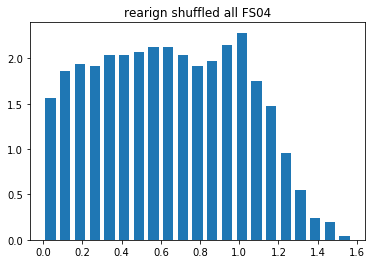

In [7]:
final_boot_test = np.load(processed +'FS04_shuffle_100000_rears_all_hist.npy')
animal_ID="FS04"
bins = np.arange(0, 1.725 + binwidth, binwidth)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.title("rearign shuffled all FS04")
plt.bar(center[0:21],final_boot_test[0:21],align='center', width=width)
plt.show()

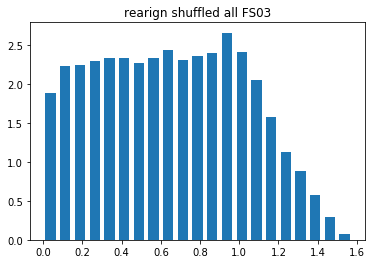

In [8]:
final_boot_test03 = np.load(processed +'FS03_shuffle_100000_rears_all_hist.npy')
animal_ID="FS03"
bins = np.arange(0, 1.725 + binwidth, binwidth)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.title("rearign shuffled all FS03")
plt.bar(center[0:21],final_boot_test03[0:21],align='center', width=width)
plt.show()

In [9]:
FS03_normalized_all_hist = np.load(processed +'FS03_Normalized_all_hist.npy')
FS03_normalized_invisible_hist = np.load(processed +'FS03_Normalized_invisible_hist.npy')
FS03_normalized_visible_hist = np.load(processed +'FS03_Normalized_visible_hist.npy')
FS04_normalized_all_hist = np.load(processed +'FS04_Normalized_all_hist.npy')
FS04_normalized_invisible_hist = np.load(processed +'FS04_Normalized_invisible_hist.npy')
FS04_normalized_visible_hist = np.load(processed +'FS04_Normalized_visible_hist.npy')
FS04=pd.read_excel(processed +'FS04_rears_new.xlsx', index_col=0)
FS03=pd.read_excel(processed +'FS03_rears_new.xlsx', index_col=0)
FS03_shuffle = np.load(processed +'FS03_shuffle_100000_rears_all_hist.npy')
FS04_shuffle = np.load(processed +'FS04_shuffle_100000_rears_all_hist.npy')

(array([1482., 1177.,  539.,  269.,  222.,  184.,  129.,  145.,   97.,
          77.,   67.,   62.,   52.,   66.,   62.,   56.,   88.,  100.,
          67.,   13.,    6.,    0.,    0.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
        1.35 , 1.425, 1.5  , 1.575, 1.65 , 1.725]),
 <a list of 23 Patch objects>)

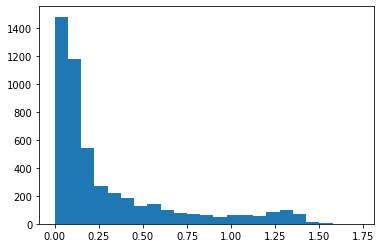

In [10]:
def get_rear_distance_from_beacon(rears):
    dist=[]
    for index,row in rears.iterrows():
        #center = (row["BeaconX"],row["BeaconY"])
        dist.append(math.sqrt((row["RatX"] - row["BeaconX"])**2 + (row["RatY"] - row["BeaconY"])**2))
    return dist 
plt.hist(get_rear_distance_from_beacon(FS04),bins=bins)

[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725]
[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725] [0.0375 0.1125 0.1875 0.2625 0.3375 0.4125 0.4875 0.5625 0.6375 0.7125
 0.7875 0.8625 0.9375 1.0125 1.0875 1.1625 1.2375 1.3125 1.3875 1.4625
 1.5375 1.6125 1.6875]


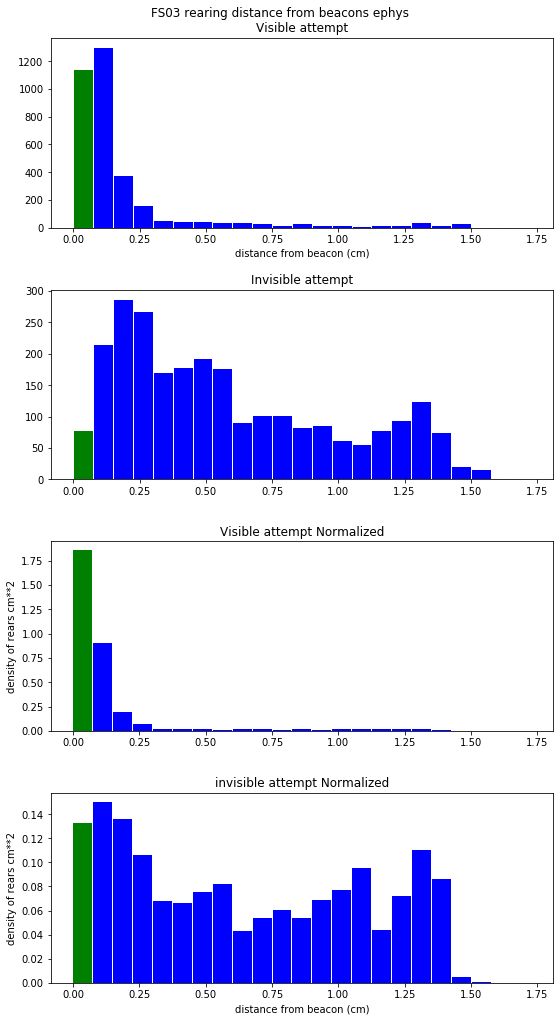

In [11]:

#print(len(area_hist_norm))
def make_simple_graphs (animal_ID,rearing,vis,invis):
    binwidth=.075
    plt.tight_layout
    bins = np.arange(0, 1.725, binwidth)
    interval=bins
    print(bins)
    bins[1]= 0.075
    fig, ax = plt.subplots(4,sharex=False,figsize=(8, 14),)#gridspec_kw={'width_ratios': [3, 1]}
    fig.suptitle(animal_ID +' rearing distance from beacons ephys',y=1)

    N, bins, patches=ax[0].hist(get_rear_distance_from_beacon(rearing.loc[rearing['Visibility']==1]),bins=bins,ec='w')
    
#     print(len(norm))
#     print(len(bins))
#     print(N*norm)
    
    ax[0].set_title('Visible attempt')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    ax[0].set_xlabel("distance from beacon (cm)")
        
    N1, bins, patches=ax[1].hist(get_rear_distance_from_beacon(rearing.loc[rearing['Visibility']==0]),bins=bins,ec='w')
    #print(N1*norm)
    ax[1].set_title('Invisible attempt')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)

   # print(area_hist_norm)

    bins = np.arange(0, 1.725 + binwidth, binwidth)
    width = 0.95 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    print(bins,center)
    patches = ax[2].bar(center, vis, align='center', width=width)
    ax[2].set_title('Visible attempt Normalized')
    ax[2].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    patches= ax[3].bar(center, invis, align='center', width=width)
    ax[3].set_title('invisible attempt Normalized')
    ax[3].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    ax[3].set_xlabel("distance from beacon (cm)")
    
    
    
        
    plt.savefig('%srat_rearing_distance_from_beacons_normalized%s.png'%(figures,animal_ID), dpi = 100)

    
    
make_simple_graphs('FS03' ,FS03,vis=FS03_normalized_visible_hist,invis=FS03_normalized_invisible_hist) 


[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725]
[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725] [0.0375 0.1125 0.1875 0.2625 0.3375 0.4125 0.4875 0.5625 0.6375 0.7125
 0.7875 0.8625 0.9375 1.0125 1.0875 1.1625 1.2375 1.3125 1.3875 1.4625
 1.5375 1.6125 1.6875]


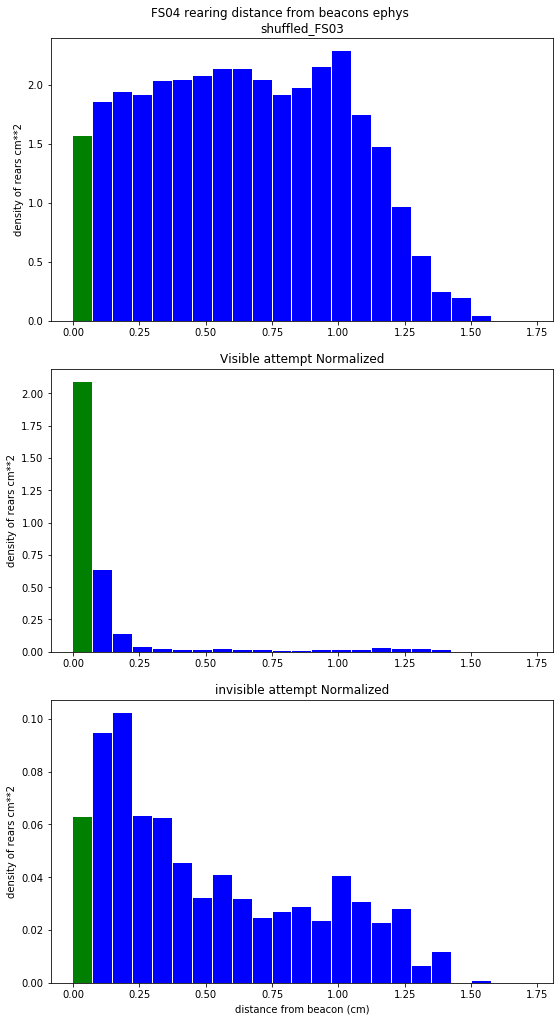

In [12]:
def make_simple_graphs_shuffle (animal_ID,rearing,vis,invis,shuffle):
    binwidth=.075
    plt.tight_layout
    bins = np.arange(0, 1.725, binwidth)
    interval=bins
    print(bins)
    bins[1]= 0.075
    fig, ax = plt.subplots(3,sharex=False,figsize=(8, 14),)#gridspec_kw={'width_ratios': [3, 1]}
    fig.suptitle(animal_ID +' rearing distance from beacons ephys',y=1)

        
    bins = np.arange(0, 1.725 + binwidth, binwidth)
    width = 0.95 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    print(bins,center)

    patches = ax[0].bar(center, shuffle, align='center', width=width)
    ax[0].set_title('shuffled_FS03')
    ax[0].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    
    
    
    patches = ax[1].bar(center, vis, align='center', width=width)
    ax[1].set_title('Visible attempt Normalized')
    ax[1].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    patches= ax[2].bar(center, invis, align='center', width=width)
    ax[2].set_title('invisible attempt Normalized')
    ax[2].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    ax[2].set_xlabel("distance from beacon (cm)")
    
    
    
        
    plt.savefig('%srat_rearing_distance_from_beacons_with_shuffle%s.png'%(figures,animal_ID), dpi = 100)

    
    
make_simple_graphs_shuffle('FS04' ,FS04,vis=FS04_normalized_visible_hist,invis=FS04_normalized_invisible_hist,shuffle=FS04_shuffle ) 


## To plot trainign progress 

In [29]:
#load

animal_day=0
animals= ['FS08','FS09','FS10','FS11']
name = 'FS08'
FS08_0_6_vis = np.load(processed +'%s_0_6_visible_hist.npy'%name)
FS08_7_14_vis = np.load(processed +'%s_7_14_visible_hist.npy'%name)
FS08_7_14_invis = np.load(processed +'%s_7_14_invisible_hist.npy'%name)
FS08_15_21_invis= np.load(processed +'%s_15_21_invisible_hist.npy'%name)
name = 'FS09'    
FS09_0_6_vis = np.load(processed +'%s_0_6_visible_hist.npy'%name)
FS09_7_14_vis = np.load(processed +'%s_7_14_visible_hist.npy'%name)
FS09_7_14_invis = np.load(processed +'%s_7_14_invisible_hist.npy'%name)
FS09_15_21_invis= np.load(processed +'%s_15_21_invisible_hist.npy'%name)
name = 'FS10'    
FS10_0_6_vis = np.load(processed +'%s_0_6_visible_hist.npy'%name)
FS10_7_14_vis = np.load(processed +'%s_7_14_visible_hist.npy'%name)
FS10_7_14_invis = np.load(processed +'%s_7_14_invisible_hist.npy'%name)
FS10_15_21_invis= np.load(processed +'%s_15_21_invisible_hist.npy'%name)
name = 'FS11'    
FS11_0_6_vis = np.load(processed +'%s_0_6_visible_hist.npy'%name)
FS11_7_14_vis = np.load(processed +'%s_7_14_visible_hist.npy'%name)
FS11_7_14_invis = np.load(processed +'%s_7_14_invisible_hist.npy'%name)
FS11_15_21_invis= np.load(processed +'%s_15_21_invisible_hist.npy'%name)


# name = 'FS08'
# FS08_0_6_vis = np.load(processed +'%s_0_6_Normalized_visible_hist.npy'%name)
# FS08_7_14_vis = np.load(processed +'%s_7_14_Normalized_visible_hist.npy'%name)
# FS08_7_14_invis = np.load(processed +'%s_7_14_Normalized_invisible_hist.npy'%name)
# FS08_15_21_invis= np.load(processed +'%s_15_21_Normalized_invisible_hist.npy'%name)
# name = 'FS09'    
# FS09_0_6_vis = np.load(processed +'%s_0_6_Normalized_visible_hist.npy'%name)
# FS09_7_14_vis = np.load(processed +'%s_7_14_Normalized_visible_hist.npy'%name)
# FS09_7_14_invis = np.load(processed +'%s_7_14_Normalized_invisible_hist.npy'%name)
# FS09_15_21_invis= np.load(processed +'%s_15_21_Normalized_invisible_hist.npy'%name)
# name = 'FS10'    
# FS10_0_6_vis = np.load(processed +'%s_0_6_Normalized_visible_hist.npy'%name)
# FS10_7_14_vis = np.load(processed +'%s_7_14_Normalized_visible_hist.npy'%name)
# FS10_7_14_invis = np.load(processed +'%s_7_14_Normalized_invisible_hist.npy'%name)
# FS10_15_21_invis= np.load(processed +'%s_15_21_Normalized_invisible_hist.npy'%name)
# name = 'FS11'    
# FS11_0_6_vis = np.load(processed +'%s_0_6_Normalized_visible_hist.npy'%name)
# FS11_7_14_vis = np.load(processed +'%s_7_14_Normalized_visible_hist.npy'%name)
# FS11_7_14_invis = np.load(processed +'%s_7_14_Normalized_invisible_hist.npy'%name)
# FS11_15_21_invis= np.load(processed +'%s_15_21_Normalized_invisible_hist.npy'%name)


[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725]
[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5   1.575 1.65  1.725] [0.0375 0.1125 0.1875 0.2625 0.3375 0.4125 0.4875 0.5625 0.6375 0.7125
 0.7875 0.8625 0.9375 1.0125 1.0875 1.1625 1.2375 1.3125 1.3875 1.4625
 1.5375 1.6125 1.6875]


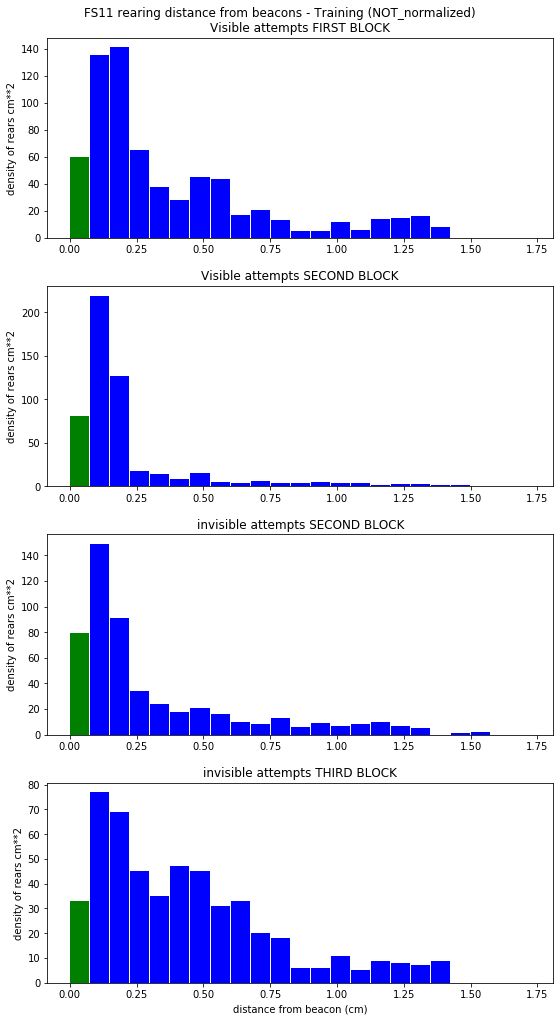

In [33]:


def make_simple_graphs_training (animal_ID,vis1,vis2,invis2,invis3):
    binwidth=.075
    plt.tight_layout
    bins = np.arange(0, 1.725, binwidth)
    interval=bins
    print(bins)
    bins[1]= 0.075
    fig, ax = plt.subplots(4,sharex=False,figsize=(8, 14),)#gridspec_kw={'width_ratios': [3, 1]}
    fig.suptitle(animal_ID +' rearing distance from beacons - Training (NOT_normalized)',y=1)

    bins = np.arange(0, 1.725 + binwidth, binwidth)
    width = 0.95 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    print(bins,center)
    
#     custom_xlim = (0, 1.75)
#     custom_ylim = (0, .55)

#     # Setting the values for all axes.
#     plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    
    patches = ax[0].bar(center, vis1, align='center', width=width)
    ax[0].set_title('Visible attempts FIRST BLOCK')
    ax[0].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
        
    patches = ax[1].bar(center, vis2, align='center', width=width)
    ax[1].set_title('Visible attempts SECOND BLOCK')
    ax[1].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)

    patches = ax[2].bar(center, invis2, align='center', width=width)
    ax[2].set_title('invisible attempts SECOND BLOCK')
    ax[2].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    
    patches= ax[3].bar(center, invis3, align='center', width=width)
    ax[3].set_title('invisible attempts THIRD BLOCK')
    ax[3].set_ylabel('density of rears cm**2')
    for i in range(0,1):
        patches[i].set_facecolor('g')
    for i in range(1, len(patches)):
        patches[i].set_facecolor('blue')
        fig.tight_layout(pad=1.5)
    ax[3].set_xlabel("distance from beacon (cm)")
    
    
    
        
    plt.savefig('%srat_rearing_distance_from_beacons_NOT_normalized%s.png'%(figures,animal_ID), dpi = 100)

    
    
make_simple_graphs_training('FS11' ,vis1=FS11_0_6_vis,vis2=FS11_7_14_vis,invis2=FS11_7_14_invis,invis3=FS11_15_21_invis) 
# normalized per 10 beacons. 

## code to normalize histograms. 

In [ ]:
norm = hist
print("sum %s" %int(sum(hist)))
print("max %s" %max(hist))
print(hist)
norm = norm[1::]
norm[:] = [max(norm) - number for number in norm]
print(norm)
print("hello%s" %int(sum(norm)))
#norm[:] = [number/int(sum(norm)) for number in norm]
print(norm)
multi=[]
for count in norm: 
    k= count/int(sum(norm))
    multi.append(k)
len(norm),len(bins)
#norm[:] = [number - 1 for number in norm]
print(multi)
print(sum(multi))
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
print(center)

plt.bar(center[1::], multi, align='center', width=width)

### GRAVEYARD 

In [ ]:
animal_ID="FS04"
bins = np.arange(0, 1.5 + binwidth, binwidth)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.title("rearign before normalization_invisible")
plt.bar(center[0:20],dist_final[0:20],align='center', width=width)
plt.show()
plt.title("overall added normalized density bands")
plt.bar(center[0:20],normal_final[0:20],align='center', width=width)
plt.show()
plt.title("rearign after normalization - rear per cm **2")
plt.bar(center[0:20],final_test[0:20],align='center', width=width)
plt.show()
plt.savefig('%srat_rearing_distance_normalized_FS04_INVIS%s.png'%(figures,animal_ID), dpi = 100)